In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True


In [125]:
img = cv2.imread('samples/golf_ball.jpg')

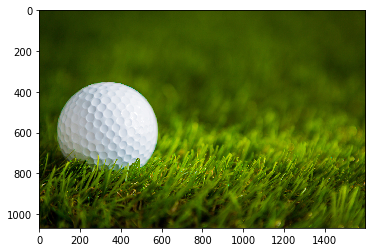

In [126]:
#cv.imshow('my image',img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

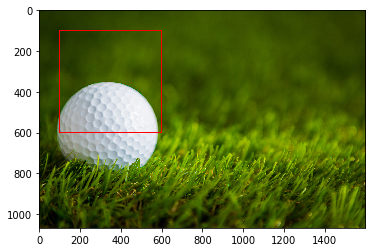

In [127]:
img=cv2.rectangle(img,(100,100),(600,600),(255,0,0),5)
plt.imshow(img)

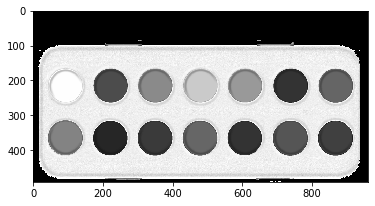

In [78]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')


In [87]:
blur = cv2.GaussianBlur(img,(3,3),0)

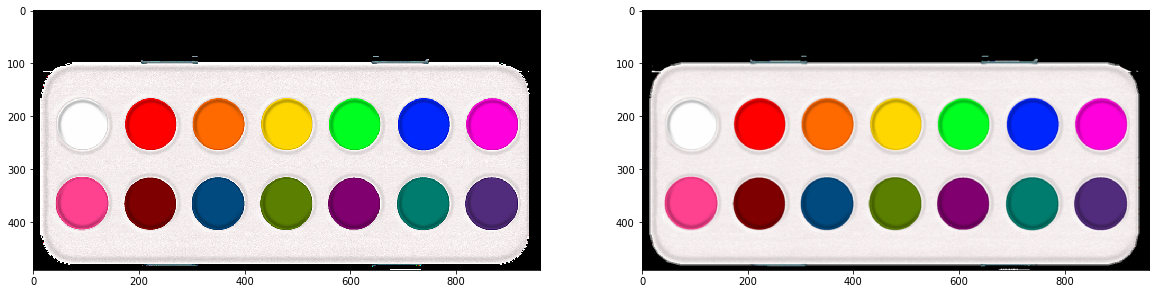

In [88]:
fig,ax=plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(blur)

In [89]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_blur = cv2.cvtColor(blur,cv2.COLOR_RGB2GRAY)

In [90]:

edge1 = cv2.Canny(gray,100,200)
edge_blur = cv2.Canny(gray_blur,100,200)


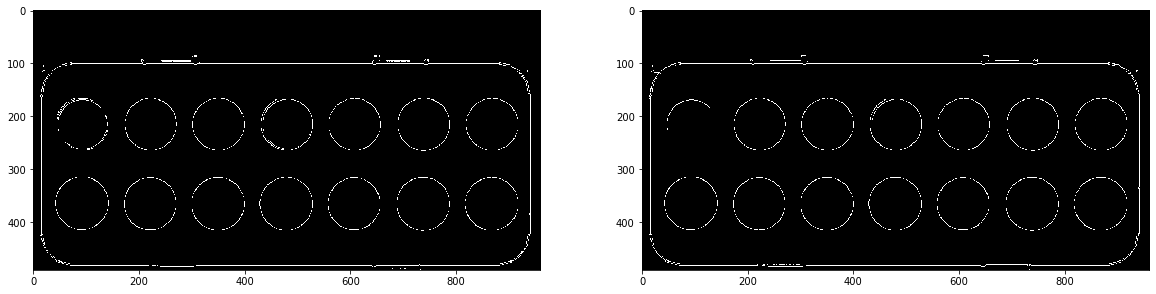

In [91]:
fig,ax=plt.subplots(1,2,figsize=(20, 20))

ax[0].imshow(edge1,cmap='gray')
ax[1].imshow(edge_blur,cmap='gray')

In [92]:
# Detect ball via color 


min_range = np.array([200,0,0],dtype='uint8')
max_range = np.array([255,30,30],dtype='uint8')
print(min_range)
mask = cv2.inRange(blur, min_range, max_range)


[200   0   0]


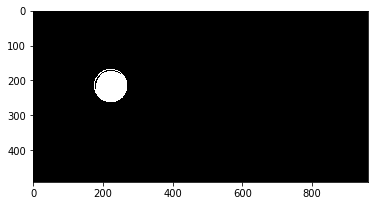

In [93]:
plt.imshow(mask,cmap='gray')

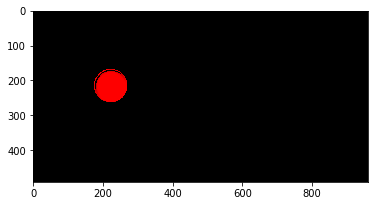

In [94]:
output = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(output)

In [123]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.25, 100)
print(len(circles[0]))
# ensure at least some circles were found
img_show = img.copy()
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(img_show, (x, y), r, (255, 250, 102), 5)
		cv2.rectangle(img_show, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

14


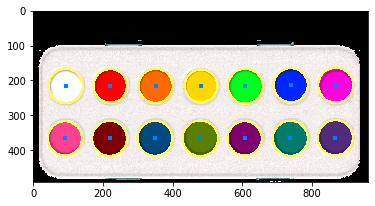

In [124]:
plt.imshow(img_show)

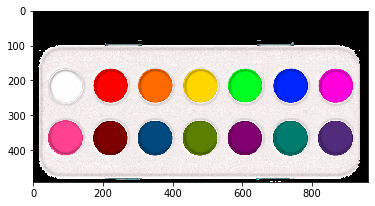

In [113]:
plt.imshow(img)